# Classiq Coding Competition Spring 2022
### Second Place Kakuro Submission by Naman Jain
Optimized each constraint's implementation and their ordering and utilized the Margolus gate version of the Toffoli gate and a direct equality check tp reduce CX count.

## Checking Oracle CX Count

In [1]:
from qiskit import QuantumCircuit

qasm_str = """OPENQASM 2.0;
include "qelib1.inc";
qreg var[8];
qreg temp[1];
qreg cond[7];
qreg extra[9];
qreg out[1];
creg cbit[8];
cx var[2],var[3];
u(pi,0,pi) var[3];
cx var[0],cond[0];
cx var[1],cond[0];
u(pi/2,-3*pi/4,-pi) cond[1];
cx var[3],cond[1];
u(0,0,-pi/4) cond[1];
cx var[4],cond[1];
u(0,0,pi/4) cond[1];
cx var[3],cond[1];
u(pi/2,0,3*pi/4) cond[1];
u(pi,0,pi) var[3];
cx var[2],var[3];
cx var[1],var[3];
cx var[2],temp[0];
cx var[0],var[2];
u(pi,0,pi) var[3];
u(pi,0,pi) var[4];
u(pi/2,-3*pi/4,-pi) cond[2];
cx var[3],cond[2];
u(0,0,-pi/4) cond[2];
cx var[4],cond[2];
u(0,0,pi/4) cond[2];
cx var[3],cond[2];
u(pi/2,0,3*pi/4) cond[2];
u(pi,0,pi) var[3];
cx var[1],var[3];
cx var[3],var[5];
u(0,pi/2,-pi/2) var[4];
u(pi,0,pi) var[5];
u(pi/2,-3*pi/4,-pi) cond[3];
cx var[5],cond[3];
u(0,0,-pi/4) cond[3];
cx var[4],cond[3];
u(0,0,pi/4) cond[3];
u(0,pi/2,-pi/2) var[4];
cx var[5],cond[3];
u(pi/2,0,3*pi/4) cond[3];
u(pi,0,pi) var[5];
cx var[3],var[5];
cx var[3],var[6];
cx var[5],temp[0];
u(pi,0,pi) var[6];
u(pi/2,-3*pi/4,-pi) cond[4];
cx var[6],cond[4];
u(0,0,-pi/4) cond[4];
cx var[4],cond[4];
u(0,0,pi/4) cond[4];
u(pi,0,pi) var[4];
cx var[6],cond[4];
u(pi/2,0,3*pi/4) cond[4];
u(pi,0,pi) var[6];
cx var[3],var[6];
cx var[3],temp[0];
u(pi,0,pi) var[3];
u(pi/2,pi/4,-pi) cond[5];
cx temp[0],cond[5];
u(0,0,-pi/4) cond[5];
cx var[4],cond[5];
u(0,0,pi/4) cond[5];
cx temp[0],cond[5];
u(pi/2,0,3*pi/4) cond[5];
cx var[6],cond[6];
cx var[1],var[6];
cx var[7],cond[6];
cx var[5],var[7];
u(pi/2,pi/4,-pi) extra[0];
cx var[3],extra[0];
u(0,0,-pi/4) extra[0];
cx var[2],extra[0];
u(0,0,pi/4) extra[0];
cx var[3],extra[0];
u(pi/2,0,3*pi/4) extra[0];
u(pi/2,pi/4,-pi) extra[1];
cx var[6],extra[1];
u(0,0,-pi/4) extra[1];
cx extra[0],extra[1];
u(0,0,pi/4) extra[1];
cx var[6],extra[1];
u(pi/2,0,3*pi/4) extra[1];
u(pi/2,pi/4,-pi) extra[2];
cx var[7],extra[2];
u(0,0,-pi/4) extra[2];
cx extra[1],extra[2];
u(0,0,pi/4) extra[2];
cx var[7],extra[2];
u(pi/2,0,3*pi/4) extra[2];
u(pi/2,pi/4,-pi) extra[3];
cx cond[0],extra[3];
u(0,0,-pi/4) extra[3];
cx extra[2],extra[3];
u(0,0,pi/4) extra[3];
cx cond[0],extra[3];
u(pi/2,0,3*pi/4) extra[3];
u(pi/2,pi/4,-pi) extra[4];
cx cond[1],extra[4];
u(0,0,-pi/4) extra[4];
cx extra[3],extra[4];
u(0,0,pi/4) extra[4];
cx cond[1],extra[4];
u(pi/2,0,3*pi/4) extra[4];
u(pi/2,pi/4,-pi) extra[5];
cx cond[2],extra[5];
u(0,0,-pi/4) extra[5];
cx extra[4],extra[5];
u(0,0,pi/4) extra[5];
cx cond[2],extra[5];
u(pi/2,0,3*pi/4) extra[5];
u(pi/2,pi/4,-pi) extra[6];
cx cond[3],extra[6];
u(0,0,-pi/4) extra[6];
cx extra[5],extra[6];
u(0,0,pi/4) extra[6];
cx cond[3],extra[6];
u(pi/2,0,3*pi/4) extra[6];
u(pi/2,pi/4,-pi) extra[7];
cx cond[4],extra[7];
u(0,0,-pi/4) extra[7];
cx extra[6],extra[7];
u(0,0,pi/4) extra[7];
cx cond[4],extra[7];
u(pi/2,0,3*pi/4) extra[7];
u(pi/2,pi/4,-pi) extra[8];
cx cond[5],extra[8];
u(0,0,-pi/4) extra[8];
cx extra[7],extra[8];
u(0,0,pi/4) extra[8];
cx cond[5],extra[8];
u(pi/2,0,3*pi/4) extra[8];
u(pi/2,0,pi) out[0];
cx cond[6],out[0];
u(0,0,-pi/4) out[0];
cx extra[8],out[0];
u(0,0,pi/4) out[0];
cx cond[6],out[0];
u(0,0,-pi/4) out[0];
u(0,0,pi/4) cond[6];
cx extra[8],out[0];
u(pi/2,0,-3*pi/4) out[0];
cx extra[8],cond[6];
u(0,0,-pi/4) cond[6];
u(0,0,pi/4) extra[8];
cx extra[8],cond[6];
u(pi/2,pi/4,-pi) extra[8];
cx cond[5],extra[8];
u(0,0,-pi/4) extra[8];
cx extra[7],extra[8];
u(pi/2,pi/4,-pi) extra[7];
cx cond[4],extra[7];
u(0,0,-pi/4) extra[7];
cx extra[6],extra[7];
u(pi/2,pi/4,-pi) extra[6];
cx cond[3],extra[6];
u(0,0,-pi/4) extra[6];
cx extra[5],extra[6];
u(pi/2,pi/4,-pi) extra[5];
cx cond[2],extra[5];
u(0,0,-pi/4) extra[5];
cx extra[4],extra[5];
u(pi/2,pi/4,-pi) extra[4];
cx cond[1],extra[4];
u(0,0,-pi/4) extra[4];
cx extra[3],extra[4];
u(pi/2,pi/4,-pi) extra[3];
cx cond[0],extra[3];
u(0,0,-pi/4) extra[3];
cx extra[2],extra[3];
u(pi/2,pi/4,-pi) extra[2];
cx var[7],extra[2];
u(0,0,-pi/4) extra[2];
cx extra[1],extra[2];
u(pi/2,pi/4,-pi) extra[1];
cx var[6],extra[1];
u(0,0,-pi/4) extra[1];
cx extra[0],extra[1];
u(pi/2,pi/4,-pi) extra[0];
cx var[3],extra[0];
u(0,0,-pi/4) extra[0];
cx var[2],extra[0];
cx var[0],var[2];
u(0,0,pi/4) extra[0];
cx var[3],extra[0];
u(pi,0,pi) var[3];
cx var[2],var[3];
u(pi,0,pi) var[3];
u(pi/2,0,3*pi/4) extra[0];
u(0,0,pi/4) extra[1];
cx var[6],extra[1];
cx var[1],var[6];
u(pi/2,0,3*pi/4) extra[1];
u(0,0,pi/4) extra[2];
cx var[7],extra[2];
cx var[5],var[7];
u(pi/2,0,3*pi/4) extra[2];
u(0,0,pi/4) extra[3];
cx cond[0],extra[3];
cx var[0],cond[0];
cx var[1],cond[0];
u(pi/2,0,3*pi/4) extra[3];
u(0,0,pi/4) extra[4];
cx cond[1],extra[4];
u(pi/2,-3*pi/4,-pi) cond[1];
cx var[3],cond[1];
u(0,0,-pi/4) cond[1];
cx var[4],cond[1];
u(0,0,pi/4) cond[1];
cx var[3],cond[1];
u(pi/2,0,3*pi/4) cond[1];
u(pi,0,pi) var[3];
cx var[2],var[3];
cx var[1],var[3];
cx var[2],temp[0];
u(pi,0,pi) var[3];
u(pi,0,pi) var[4];
u(pi/2,0,3*pi/4) extra[4];
u(0,0,pi/4) extra[5];
cx cond[2],extra[5];
u(pi/2,-3*pi/4,-pi) cond[2];
cx var[3],cond[2];
u(0,0,-pi/4) cond[2];
cx var[4],cond[2];
u(0,0,pi/4) cond[2];
cx var[3],cond[2];
u(pi/2,0,3*pi/4) cond[2];
u(pi,0,pi) var[3];
cx var[1],var[3];
cx var[3],var[5];
u(0,pi/2,-pi/2) var[4];
u(pi,0,pi) var[5];
u(pi/2,0,3*pi/4) extra[5];
u(0,0,pi/4) extra[6];
cx cond[3],extra[6];
u(pi/2,-3*pi/4,-pi) cond[3];
cx var[5],cond[3];
u(0,0,-pi/4) cond[3];
cx var[4],cond[3];
u(0,0,pi/4) cond[3];
u(0,pi/2,-pi/2) var[4];
cx var[5],cond[3];
u(pi/2,0,3*pi/4) cond[3];
u(pi,0,pi) var[5];
cx var[3],var[5];
cx var[3],var[6];
cx var[5],temp[0];
u(pi,0,pi) var[6];
u(pi/2,0,3*pi/4) extra[6];
u(0,0,pi/4) extra[7];
cx cond[4],extra[7];
u(pi/2,-3*pi/4,-pi) cond[4];
cx var[6],cond[4];
u(0,0,-pi/4) cond[4];
cx var[4],cond[4];
u(0,0,pi/4) cond[4];
u(pi,0,pi) var[4];
cx var[6],cond[4];
u(pi/2,0,3*pi/4) cond[4];
u(pi,0,pi) var[6];
cx var[3],var[6];
cx var[3],temp[0];
cx var[6],cond[6];
cx var[7],cond[6];
u(pi/2,0,3*pi/4) extra[7];
u(0,0,pi/4) extra[8];
cx cond[5],extra[8];
u(pi/2,pi/4,-pi) cond[5];
cx temp[0],cond[5];
u(0,0,-pi/4) cond[5];
cx var[4],cond[5];
u(0,0,pi/4) cond[5];
cx temp[0],cond[5];
u(pi/2,0,3*pi/4) cond[5];
u(pi/2,0,3*pi/4) extra[8];

"""

Oracle = QuantumCircuit.from_qasm_str(qasm_str)

print(f"Original oracle depth: {Oracle.depth()}")
print(f"Original operation count: {Oracle.count_ops()}")

# Checking circuit is fully decomposed
from qiskit import transpile
Oracle = transpile(Oracle, basis_gates=['u', 'cx'])

print(f"Decomposed oracle depth: {Oracle.depth()}")
print(f"Decomposed operation count: {Oracle.count_ops()}")

Original oracle depth: 166
Original operation count: OrderedDict([('u', 146), ('cx', 126)])
Decomposed oracle depth: 166
Decomposed operation count: OrderedDict([('u', 142), ('cx', 126)])


## Executing Grover Circuit

### Imports

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import execute, transpile, assemble
from qiskit import Aer
from qiskit.visualization import plot_histogram, plot_state_city

import numpy as np
import matplotlib.pyplot as plt

### Defining helper functions
#### 1. Grover Diffuser operation

In [3]:
def diffuser(nqubits):
    q = QuantumCircuit(nqubits)
    
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        q.h(qubit)
    
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        q.x(qubit)
    
    # Do multi-controlled-Z gate
    q.h(nqubits-1)
    q.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    q.h(nqubits-1)
    
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        q.x(qubit)
    
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        q.h(qubit)
    
    # We will return the diffuser as a gate
    U_s = q.to_gate()
    U_s.name = "U$_s$"
    return U_s

#### 2. XOR operation

In [7]:
def XOR(q, a, b, output):
    q.cx(a, output)
    q.cx(b, output)

#### 3. Oracle - to mark the solution states

In [4]:
def oracle(circuit, var, condition, temp, out, extra = None):
    qmap = {'x0':var[0], 'x1':var[1], 'x2':var[2], 'x3_0':var[3], 'x3_1':var[4], 'x4':var[5], 'x5':var[6], 'x6':var[7]}
    
    # X0 != X1
    XOR(circuit, qmap['x0'], qmap['x1'], condition[0])
    
    # X2 + 2 != X3 ===> xor(x2, 0) != x3_0 ===> x2 != x3_0 OR x3_1 == 0
    circuit.cx(qmap['x2'], qmap['x3_0'])
    circuit.x(qmap['x3_0'])
    circuit.x(condition[1])
    circuit.rccx(qmap['x3_1'], qmap['x3_0'], condition[1])
    circuit.x(qmap['x3_0'])    
    # Restore
    circuit.cx(qmap['x2'], qmap['x3_0'])
    
    # X1 != X3 ===> xor(x3_0, x1) == 1 || xor(x3_1,0) == 1 ===> xor(x3_0, x1) == 1 || x3_1 == 1
    circuit.cx(qmap['x1'], qmap['x3_0'])
    circuit.x(qmap['x3_0'])
    circuit.x(qmap['x3_1'])
    circuit.x(condition[2])
    circuit.rccx(qmap['x3_1'], qmap['x3_0'], condition[2])
    circuit.x(qmap['x3_1'])
    circuit.x(qmap['x3_0'])
    # Restore
    circuit.cx(qmap['x1'], qmap['x3_0'])
    
    # X4 != X3 ===> xor(x3_0, x4) == 1 || xor(x3_1,0) == 1 ===> xor(x3_0, x4) == 1 || x3_1 == 1
    circuit.cx(qmap['x3_0'], qmap['x4'])
    circuit.x(qmap['x4'])
    circuit.x(qmap['x3_1'])
    circuit.x(condition[3])
    circuit.rccx(qmap['x3_1'], qmap['x4'], condition[3])
    circuit.x(qmap['x3_1'])
    circuit.x(qmap['x4'])
    # Restore
    circuit.cx(qmap['x3_0'], qmap['x4'])
    
    # X5 != X3 ===> xor(x3_0, x5) == 1 || xor(x3_1,0) == 1 ===> xor(x3_0, x5) == 1 || x3_1 == 1
    circuit.cx(qmap['x3_0'], qmap['x5'])
    circuit.x(qmap['x5'])
    circuit.x(qmap['x3_1'])
    circuit.x(condition[4])
    circuit.rccx(qmap['x3_1'], qmap['x5'], condition[4])
    circuit.x(qmap['x3_1'])
    circuit.x(qmap['x5'])
    # Restore
    circuit.cx(qmap['x3_0'], qmap['x5'])
    
    # X2 + X4 + X3_0 == 1 && x3_1 == 1
    circuit.cx(qmap['x2'], temp[0])
    circuit.cx(qmap['x4'], temp[0])    
    circuit.cx(qmap['x3_0'], temp[0])
    circuit.rccx(qmap['x3_1'], temp[0], condition[5])
    
    # X3 == 2 ==-> x3_0 == 0 && x3_1 == 1 .... x3_0 == 0
    circuit.x(qmap['x3_0'])
    
    # X5 != X6
    XOR(circuit, qmap['x5'], qmap['x6'], condition[6])
    
    # X0 != X2
    circuit.cx(qmap['x0'], qmap['x2'])

    # X1 != X5
    circuit.cx(qmap['x1'], qmap['x5'])
    
    # X4 != X6
    circuit.cx(qmap['x4'], qmap['x6'])
    
    temporary = [i for i in condition[::-1]]
    temporary.append(qmap['x6'])
    temporary.append(qmap['x5'])
    temporary.append(qmap['x3_0'])
    temporary.append(qmap['x2'])
    
    temporary = temporary[::-1]
    
    if extra is None:
        circuit.mcx(temporary, out)
    else:
        circuit.rccx(temporary[0], temporary[1], extra[0])
        for i in range(len(temporary) - 3):
            circuit.rccx(extra[i], temporary[2+i], extra[i+1])
            
        circuit.ccx(extra[i+1], temporary[2+i+1], out)
        
        # Uncompute 'extra' qubits 
        for i in range(len(temporary) -3-1, -1, -1):
            circuit.rccx(extra[i], temporary[2+i], extra[i+1])
        circuit.rccx(temporary[0], temporary[1], extra[0])
    
    
    # Uncomputation
    # X3 == 2
    circuit.x(qmap['x3_0'])
    
    # X0 != X2
    circuit.cx(qmap['x0'], qmap['x2'])

    # X1 != X5
    circuit.cx(qmap['x1'], qmap['x5'])
    
    # X4 != X6
    circuit.cx(qmap['x4'], qmap['x6'])
    
    # X0 != X1
    XOR(circuit, qmap['x0'], qmap['x1'], condition[0])
    
    # X2 + 2 != X3 ===> xor(x2, 0) != x3_0 ===> x2 != x3_0 OR x3_1 == 0
    circuit.cx(qmap['x2'], qmap['x3_0'])
    circuit.x(qmap['x3_0'])
    circuit.x(condition[1])
    circuit.rccx(qmap['x3_1'], qmap['x3_0'], condition[1])
    circuit.x(qmap['x3_0'])    
    # Restore
    circuit.cx(qmap['x2'], qmap['x3_0'])
    
    # X1 != X3 ===> xor(x3_0, x1) == 1 || xor(x3_1,0) == 1 ===> xor(x3_0, x1) == 1 || x3_1 == 1
    circuit.cx(qmap['x1'], qmap['x3_0'])
    circuit.x(qmap['x3_0'])
    circuit.x(qmap['x3_1'])
    circuit.x(condition[2])
    circuit.rccx(qmap['x3_1'], qmap['x3_0'], condition[2])
    circuit.x(qmap['x3_1'])
    circuit.x(qmap['x3_0'])
    # Restore
    circuit.cx(qmap['x1'], qmap['x3_0'])
    
    # X4 != X3 ===> xor(x3_0, x4) == 1 || xor(x3_1,0) == 1 ===> xor(x3_0, x4) == 1 || x3_1 == 1
    circuit.cx(qmap['x3_0'], qmap['x4'])
    circuit.x(qmap['x4'])
    circuit.x(qmap['x3_1'])
    circuit.x(condition[3])
    circuit.rccx(qmap['x3_1'], qmap['x4'], condition[3])
    circuit.x(qmap['x3_1'])
    circuit.x(qmap['x4'])
    # Restore
    circuit.cx(qmap['x3_0'], qmap['x4'])
    
    # X5 != X3 ===> xor(x3_0, x5) == 1 || xor(x3_1,0) == 1 ===> xor(x3_0, x5) == 1 || x3_1 == 1
    circuit.cx(qmap['x3_0'], qmap['x5'])
    circuit.x(qmap['x5'])
    circuit.x(qmap['x3_1'])
    circuit.x(condition[4])
    circuit.rccx(qmap['x3_1'], qmap['x5'], condition[4])
    circuit.x(qmap['x3_1'])
    circuit.x(qmap['x5'])
    # Restore
    circuit.cx(qmap['x3_0'], qmap['x5'])
    
    # X2 + X4 + X3_0 == 1 && x3_1 == 1
    circuit.cx(qmap['x2'], temp[0])
    circuit.cx(qmap['x4'], temp[0])    
    circuit.cx(qmap['x3_0'], temp[0])
    circuit.rccx(qmap['x3_1'], temp[0], condition[5])
    
    # X5 != X6
    XOR(circuit, qmap['x5'], qmap['x6'], condition[6])

### Building the Circuit
#### 1. Creating Quantum registers to hold the variables, temporaries, extra qubits used in building the oracle, and setting up the Classical register to hold the results after measurement

In [5]:
var_qubits = QuantumRegister(8, name='var')
condition_qubits = QuantumRegister(7, name='cond')
temp_qubits = QuantumRegister(1, name='temp')
extra_qubits = QuantumRegister(9, name='extra')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(8, name='cbit')

#### 2. Creating the actual circuit

The circuit is initialized so that the variables are in the uniform superposition state, and an output qubit holds the |-> state to apply the phase flip. 

5 Grover operators are applied. Each operator consists of a call to the oracle and the diffuser functions defined above which together make the amplitude amplification process possible. Each operator is separated by a barrier to show distinction.

In the end, a measurement operation is applied to the registers holding the solution.

In [8]:
circuit = QuantumCircuit(var_qubits, temp_qubits, condition_qubits, extra_qubits, output_qubit, cbits)

# A qubit initialized in the |-> state to apply phase flip
circuit.x(output_qubit)
circuit.h(output_qubit)

# Initial State preparation
circuit.h(var_qubits)

circuit.barrier()

# GROVER OPERATOR 1 ============================
# Oracle ---------------------------------------
oracle(circuit, var_qubits, condition_qubits, temp_qubits, output_qubit, extra = extra_qubits)
# ----------------------------------------------
circuit.append(diffuser(8), range(var_qubits.size))
circuit.barrier()
# ==============================================
# GROVER OPERATOR 2 ============================
# Oracle ---------------------------------------
oracle(circuit, var_qubits, condition_qubits, temp_qubits, output_qubit, extra = extra_qubits)
# ----------------------------------------------
circuit.append(diffuser(8), range(var_qubits.size))
circuit.barrier()
# ==============================================
# GROVER OPERATOR 3 ============================
# Oracle ---------------------------------------
oracle(circuit, var_qubits, condition_qubits, temp_qubits, output_qubit, extra = extra_qubits)
# ----------------------------------------------
circuit.append(diffuser(8), range(var_qubits.size))
circuit.barrier()
# ==============================================
# GROVER OPERATOR 4 ============================
# Oracle ---------------------------------------
oracle(circuit, var_qubits, condition_qubits, temp_qubits, output_qubit, extra = extra_qubits)
# ----------------------------------------------
circuit.append(diffuser(8), range(var_qubits.size))
circuit.barrier()
# ==============================================
# GROVER OPERATOR 5 ============================
# Oracle ---------------------------------------
oracle(circuit, var_qubits, condition_qubits, temp_qubits, output_qubit, extra = extra_qubits)
# ----------------------------------------------
circuit.append(diffuser(8), range(var_qubits.size))
circuit.barrier()
# ==============================================

circuit.measure(var_qubits, cbits)

### Testing the circuit

The circuit is tested on the Qasm Simulator with 8192 shots.

In [9]:
nshots = 8192
qsim = Aer.get_backend('qasm_simulator')
job = execute(circuit, qsim, shots = nshots)
result = job.result()
counts = result.get_counts()

#### 1. Plotting the results

The results are plotted on a histogram, and the top six bit strings with highest probabilities are also shown below.

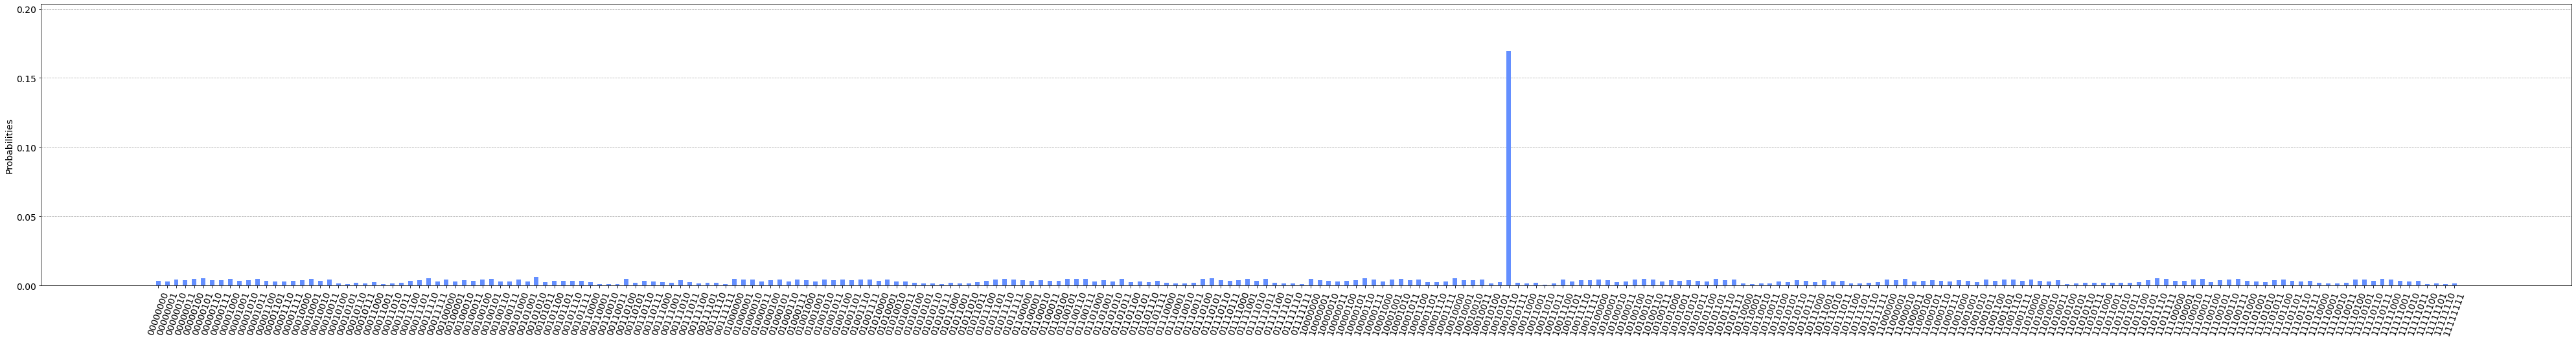

In [12]:
plot_histogram(counts, figsize=(70,8), bar_labels=False)

In [13]:
results = [(k, v, v/nshots) for k, v in sorted(counts.items(), key = lambda x: x[1], reverse=True)]
results[:6]

[('10010110', 1388, 0.16943359375),
 ('00101010', 51, 0.0062255859375),
 ('11011110', 44, 0.00537109375),
 ('00000101', 43, 0.0052490234375),
 ('10000110', 43, 0.0052490234375),
 ('10010000', 43, 0.0052490234375)]

#### 2. Displaying the final solution

In [14]:
solution = results[0][0]
final_answer = 'x6 = ' + solution[0]
final_answer += ', x5 = ' + solution[1]
final_answer += ', x4 = ' + solution[2]
final_answer += ', x3 = ' + str(int(solution[3:5], base=2))
final_answer += ', x2 = ' + str(int(solution[5]) + 2)
final_answer += ', x1 = ' + solution[6]
final_answer += ', x0 = ' + str(int(solution[7]) + 2)
final_answer

'x6 = 1, x5 = 0, x4 = 0, x3 = 2, x2 = 3, x1 = 1, x0 = 2'

### Calculating the Oracle cost

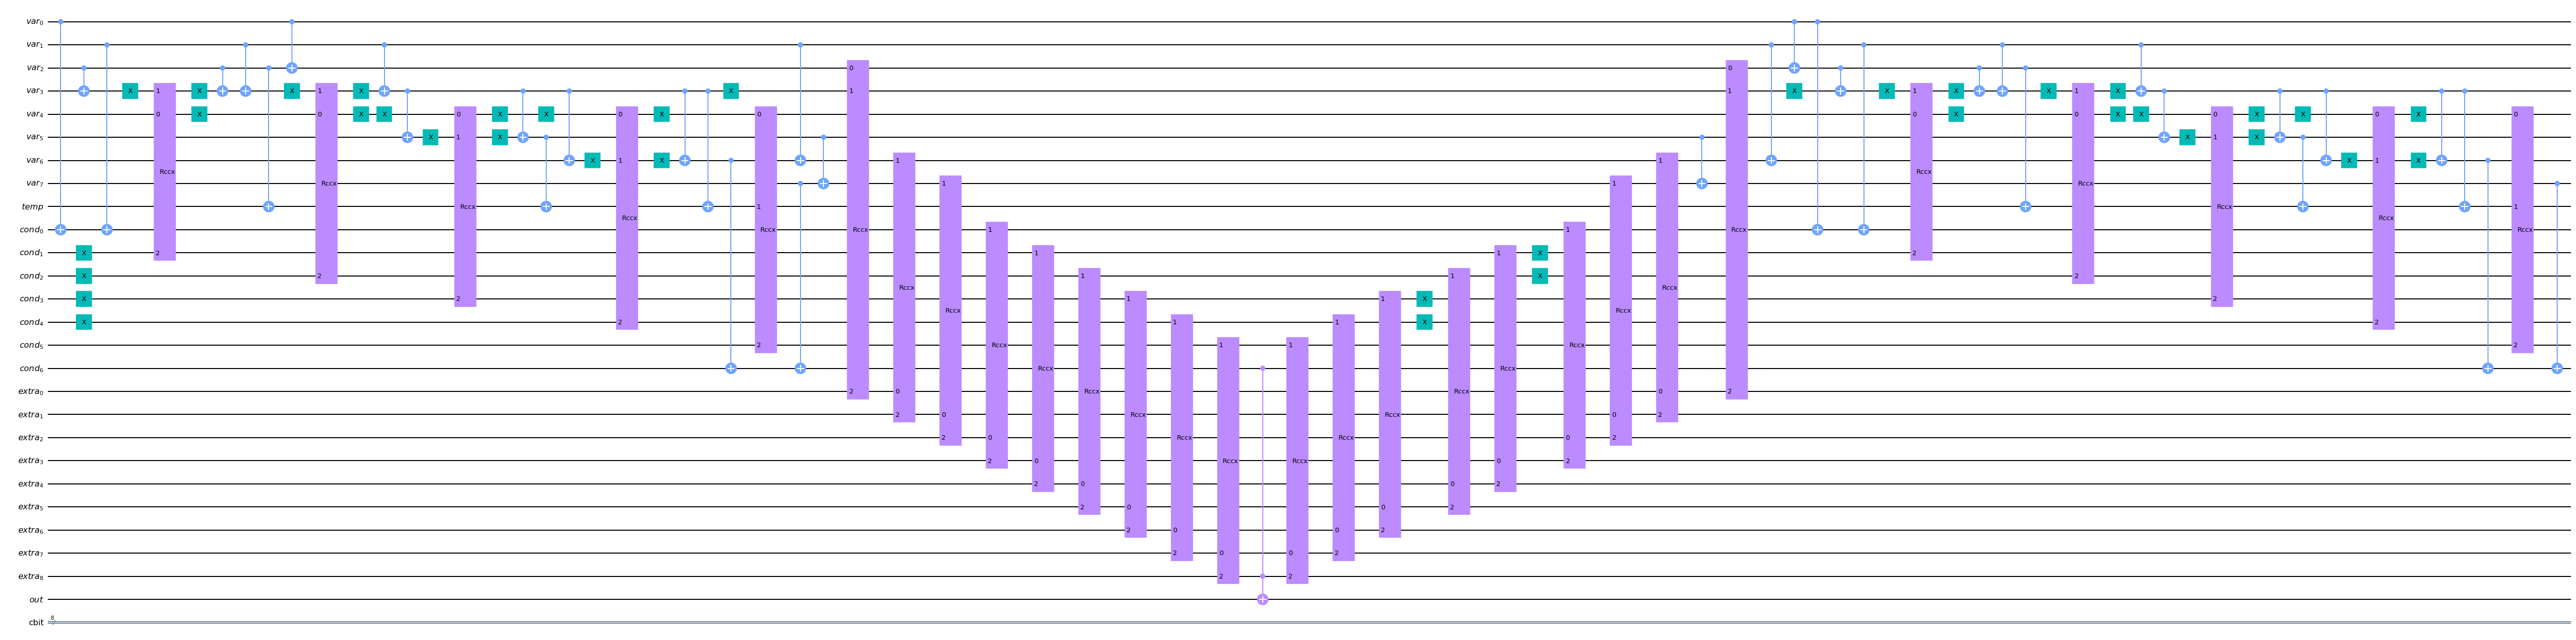

In [15]:
var_qubits = QuantumRegister(8, name='var')
condition_qubits = QuantumRegister(7, name='cond')
temp_qubits = QuantumRegister(1, name='temp')
output_qubit = QuantumRegister(1, name='out')
extra_qubits = QuantumRegister(9, name='extra')
cbits = ClassicalRegister(8, name='cbit')

circuit = QuantumCircuit(var_qubits, temp_qubits, condition_qubits, extra_qubits, output_qubit, cbits)

oracle(circuit, var_qubits, condition_qubits, temp_qubits, output_qubit, extra = extra_qubits)

circuit.draw("mpl", fold = -1)

In [16]:
qc = transpile(circuit, basis_gates=['u','cx'])
print('Circuit depth: ', qc.depth())
print('Ops: ', qc.count_ops())

Circuit depth:  166
Ops:  OrderedDict([('u', 146), ('cx', 126)])


**_The oracle requires 126 CX gates._**

### Converting to QASM

In [17]:
qc.qasm(formatted=True, filename='kakuro_oracle.qasm')

OPENQASM 2.0;
include "qelib1.inc";
qreg var[8];
qreg temp[1];
qreg cond[7];
qreg extra[9];
qreg out[1];
creg cbit[8];
cx var[2],var[3];
u(pi,0,pi) var[3];
cx var[0],cond[0];
cx var[1],cond[0];
u(pi/2,-3*pi/4,-pi) cond[1];
cx var[3],cond[1];
u(0,0,-pi/4) cond[1];
cx var[4],cond[1];
u(0,0,pi/4) cond[1];
cx var[3],cond[1];
u(pi/2,0,3*pi/4) cond[1];
u(pi,0,pi) var[3];
cx var[2],var[3];
cx var[1],var[3];
cx var[2],temp[0];
cx var[0],var[2];
u(pi,0,pi) var[3];
u(pi,0,pi) var[4];
u(pi/2,-3*pi/4,-pi) cond[2];
cx var[3],cond[2];
u(0,0,-pi/4) cond[2];
cx var[4],cond[2];
u(0,0,pi/4) cond[2];
cx var[3],cond[2];
u(pi/2,0,3*pi/4) cond[2];
u(pi,0,pi) var[3];
cx var[1],var[3];
cx var[3],var[5];
u(0,pi/2,-pi/2) var[4];
u(pi,0,pi) var[5];
u(pi/2,-3*pi/4,-pi) cond[3];
cx var[5],cond[3];
u(0,0,-pi/4) cond[3];
cx var[4],cond[3];
u(0,0,pi/4) cond[3];
u(0,pi/2,-pi/2) var[4];
cx var[5],cond[3];
u(pi/2,0,3*pi/4) cond[3];
u(pi,0,pi) var[5];
cx var[3],var[5];
cx var[3],var[6];
cx var[5],temp[0];
u(pi,0,pi) var[

## - Solution by _Naman Jain_